In [1]:
from nba_api.stats.endpoints import leaguegamelog
from nba_api.stats.static import teams 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
teams_info = teams.get_teams()

In [3]:
abbreviations = [x['abbreviation'] for x in teams_info]
print(abbreviations)

['ATL', 'BOS', 'CLE', 'NOP', 'CHI', 'DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MIA', 'MIL', 'MIN', 'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET', 'CHA']


In [4]:
league_game_log = leaguegamelog.LeagueGameLog(season = '2021', player_or_team_abbreviation = 'T').get_data_frames()[0]
league_game_log.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22021,1610612747,LAL,Los Angeles Lakers,0022100002,2021-10-19,LAL vs. GSW,L,240,45,...,40,45,21,7,4,18,25,114,-7,1
1,22021,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,41,...,41,50,30,9,2,17,18,121,7,1
2,22021,1610612749,MIL,Milwaukee Bucks,0022100001,2021-10-19,MIL vs. BKN,W,240,48,...,41,54,25,8,9,8,19,127,23,1
3,22021,1610612751,BKN,Brooklyn Nets,0022100001,2021-10-19,BKN @ MIL,L,240,37,...,39,44,19,3,9,13,17,104,-23,1
4,22021,1610612766,CHA,Charlotte Hornets,0022100003,2021-10-20,CHA vs. IND,W,240,46,...,34,46,29,9,5,8,21,123,1,1


In [5]:
columns = list(league_game_log.columns)[8:-1]
print(columns)

['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS']


In [6]:
team_a = input("Type the abbreviation of the home team: ")
while team_a not in abbreviations:
    print("Invalid team.")
    team_a = input("Type the abbreviation of the home team: ")
    
team_b = input("Type the abbreviation of the away team: ")
while team_b not in abbreviations:
    print("Invalid team.")
    team_b = input("Type the abbreviation of the away team: ")

Type the abbreviation of the home team: PHI
Type the abbreviation of the away team: LAL


In [7]:
team_a_games = league_game_log[league_game_log['TEAM_ABBREVIATION'] == team_a]
team_b_games = league_game_log[league_game_log['TEAM_ABBREVIATION'] == team_b]

team_a_opp_games = league_game_log[(league_game_log['MATCHUP'].str.contains(team_a)) & (league_game_log['TEAM_ABBREVIATION'] != team_a)]
team_b_opp_games = league_game_log[(league_game_log['MATCHUP'].str.contains(team_b)) & (league_game_log['TEAM_ABBREVIATION'] != team_b)]

In [22]:
def plot_stats_chart(title, games, opp_games, stat):
    games = games.iloc[-20:,:]
    opp_games = opp_games.iloc[-20:,:]
    dates = np.array(games['GAME_DATE'])
    made = np.array(games[stat])
    conceded = np.array(opp_games[stat])
    plt.plot(dates, made, c='blue', label ='Made')
    plt.plot(dates, conceded, c='red', label ='Conceded')
    for i in range(len(dates)):
        host = 'A' if '@' in games.iloc[i,:]['MATCHUP'] else 'H'
        plt.annotate(host, (dates[i], made[i] + 1), fontsize=8)
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(stat)
    
    for xc in dates:
        plt.axvline(x=xc, color='black', linewidth=0.5)
        
    plt.xticks(fontsize=10, rotation=90)
    
    plt.legend()
    
    plt.savefig(title + '.jpg', dpi=100)
    
    plt.show()

In [9]:
stat = input("Type the stat you want to visualize: ").upper()
while stat not in columns:
    print("Invalid stat.")
    stat = input("Type the stat you want to visualize: ")

Type the stat you want to visualize: PTS


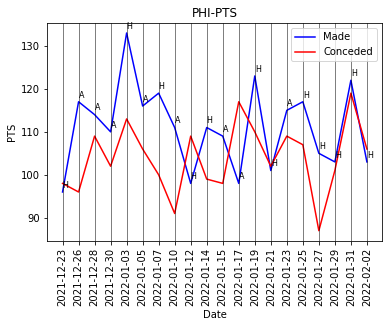

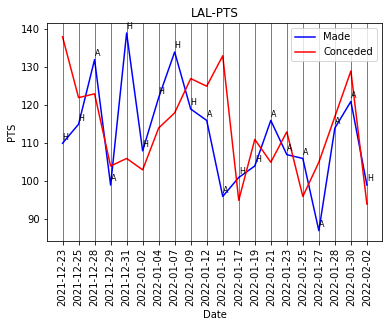

In [23]:
plot_stats_chart("{}-{}".format(team_a, stat), team_a_games, team_a_opp_games, stat)
plot_stats_chart("{}-{}".format(team_b, stat), team_b_games, team_b_opp_games, stat)

In [11]:
while True:
    line = input("Type the line that represents the spread: ")
    try:
        line = float(line)
        break
    except ValueError:
        pass
    print("Invalid value.")

Type the line that represents the spread: 210


In [12]:
def plot_totals_with_line(team, games, opp_games, line, stat):
    games = games.iloc[-20:,:]
    opp_games = opp_games.iloc[-20:,:]
    dates = np.array(games['GAME_DATE'])
    made = np.array(games[stat])
    conceded = np.array(opp_games[stat])
    totals = made + conceded
    plt.plot(dates, totals, c='blue', label ='Totals')
    for i in range(len(dates)):
        host = 'A' if '@' in games.iloc[i,:]['MATCHUP'] else 'H'
        plt.annotate(host, (dates[i], made[i] + 1), fontsize=8)
    
    title = "Totals {}-{}".format(team, stat)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('{} Totals'.format(stat))
    
    plt.axhline(y=line, color='r', linestyle='-')
    for xc in dates:
        plt.axvline(x=xc, color='black', linewidth=0.5)
        
    plt.xticks(fontsize=10, rotation=90)
    
    plt.legend()
    
    plt.savefig(title + '.jpg', dpi=100)
    
    greater = (totals > line).sum()
    pct = greater*100/len(totals)
    print("{} had their totals above {} in {}% of the last {} games".format(team, line, pct, len(totals)))
    
    plt.show()

PHI had their totals above 210.0 in 55.0% of the last 20 games


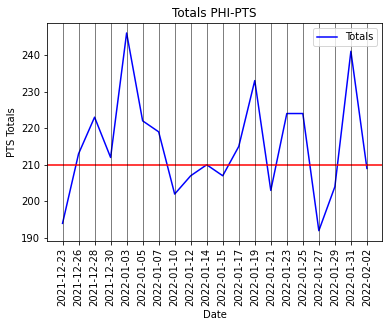

LAL had their totals above 210.0 in 75.0% of the last 20 games


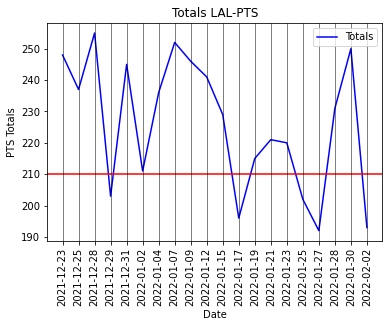

In [13]:
plot_totals_with_line(team_a, team_a_games, team_a_opp_games, line, stat)
plot_totals_with_line(team_b, team_b_games, team_b_opp_games, line, stat)